In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Pencarian data

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
import os

#base_dir = '/content/drive/MyDrive/pengenalan pola/dog n cat/training_set'
#test_dir = '/content/drive/MyDrive/pengenalan pola/dog n cat/test_set'

base_dir = '/content/drive/MyDrive/pengenalan pola/dog n cat/training_set/training_set'
test_dir = '/content/drive/MyDrive/pengenalan pola/dog n cat/test_set/test_set'

train_dir = base_dir


#Pengambilan ciri

In [9]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        subset='validation')


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 4728 images belonging to 2 classes.
Found 1181 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


#Pemilihan model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

#Pelatihan

In [11]:
history = model.fit(
    train_generator,
    # steps_per_epoch=50,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/20
237/237 [==============================] - 341s 1s/step - loss: 0.6307 - accuracy: 0.6732 - val_loss: 0.6155 - val_accuracy: 0.6780
Epoch 2/20
237/237 [==============================] - 311s 1s/step - loss: 0.6179 - accuracy: 0.6777 - val_loss: 0.5968 - val_accuracy: 0.6788
Epoch 3/20
237/237 [==============================] - 319s 1s/step - loss: 0.6127 - accuracy: 0.6802 - val_loss: 0.5989 - val_accuracy: 0.6780
Epoch 4/20
237/237 [==============================] - 308s 1s/step - loss: 0.5942 - accuracy: 0.6823 - val_loss: 0.5901 - val_accuracy: 0.6797
Epoch 5/20
237/237 [==============================] - 309s 1s/step - loss: 0.5927 - accuracy: 0.6813 - val_loss: 0.5626 - val_accuracy: 0.6822
Epoch 6/20
237/237 [==============================] - 300s 1s/step - loss: 0.5788 - accuracy: 0.6870 - val_loss: 0.5601 - val_accuracy: 0.6856
Epoch 7/20
237/237 [==============================] - 304s 1s/step - loss: 0.5712 - accuracy: 0.6944 - val_loss: 0.5591 - val_accuracy: 0.7000

#Evaluasi

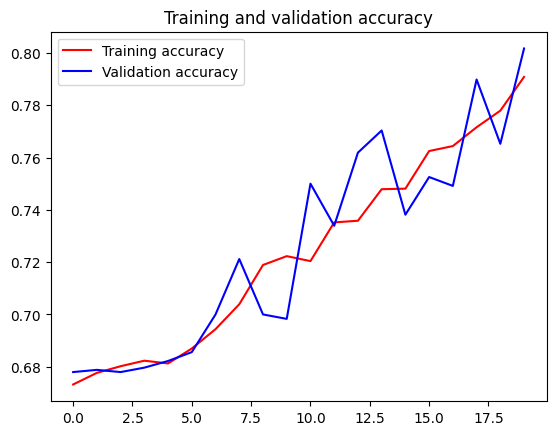

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()